4  Probabilistic Learning with Naive Bayes Classification

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype

url = "https://raw.githubusercontent.com/businessdatasolutions/courses/main/datamining-n/datasets/smsspam.csv"
rawDF = pd.read_csv(url)
rawDF.head()


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Define categorical type for 'type' column
catType = CategoricalDtype(categories=["ham", "spam"], ordered=False) 
rawDF.type = rawDF.type.astype(catType)
rawDF.type

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: type, Length: 5572, dtype: category
Categories (2, object): ['ham', 'spam']

In [4]:
#To see how the types of sms messages are distributed you can compare the counts for each category.
rawDF.type.value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
#Often you’ll prefer the relative counts.
rawDF.type.value_counts(normalize=True)

type
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


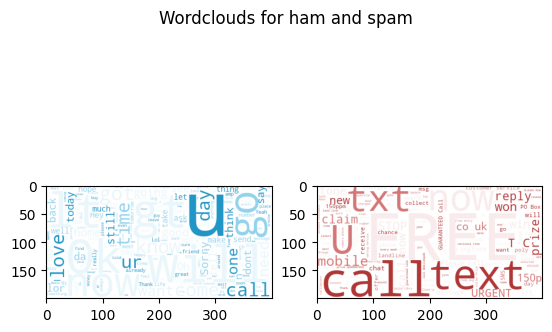

In [ ]:
#%pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#You can also visually inspect the data by creating wordclouds for each sms type.
# Generate a word cloud image]
hamText = ' '.join([Text for Text in rawDF[rawDF['type']=='ham']['text']])
spamText = ' '.join([Text for Text in rawDF[rawDF['type']=='spam']['text']])
# Make sure the cell where rawDF is defined has been run before this cell.
colorListHam=['#e9f6fb','#92d2ed','#2195c5']
colorListSpam=['#f9ebeb','#d57676','#b03636']
colormapHam=colors.ListedColormap(colorListHam)
colormapSpam=colors.ListedColormap(colorListSpam)
wordcloudHam = WordCloud(background_color='white', colormap=colormapHam).generate(hamText)
wordcloudSpam = WordCloud(background_color='white', colormap=colormapSpam).generate(spamText)

# Display the generated image:
# the matplotlib way:
fig, (wc1, wc2) = plt.subplots(1, 2)
fig.suptitle('Wordclouds for ham and spam')
wc1.imshow(wordcloudHam)
wc2.imshow(wordcloudSpam)
plt.show()

In [10]:
#%pip install scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(rawDF.text)
wordsDF = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
wordsDF.head()

,000,03,04,0800,08000839402,08000930705,10,100,1000,10p,...,yes,yesterday,yet,yo,you,your,yours,yourself,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
